In [1]:
###############################################################################
# The Institute for the Design of Advanced Energy Systems Integrated Platform
# Framework (IDAES IP) was produced under the DOE Institute for the
# Design of Advanced Energy Systems (IDAES).
#
# Copyright (c) 2018-2023 by the software owners: The Regents of the
# University of California, through Lawrence Berkeley National Laboratory,
# National Technology & Engineering Solutions of Sandia, LLC, Carnegie Mellon
# University, West Virginia University Research Corporation, et al.
# All rights reserved.  Please see the files COPYRIGHT.md and LICENSE.md
# for full copyright and license information.
###############################################################################

In [2]:
from idaes.core.surrogate.pysmo.sampling import HammersleySampling

In [3]:
bounds_info = [[273, 1], [373, 50]]
init_data = HammersleySampling(
    data_input=bounds_info, number_of_samples=25, sampling_type="creation"
)

Sampling type:  creation 



In [4]:
samples = init_data.sample_points()
print(samples)

[[273.        1.     ]
 [277.       25.5    ]
 [281.       13.25   ]
 [285.       37.75   ]
 [289.        7.125  ]
 [293.       31.625  ]
 [297.       19.375  ]
 [301.       43.875  ]
 [305.        4.0625 ]
 [309.       28.5625 ]
 [313.       16.3125 ]
 [317.       40.8125 ]
 [321.       10.1875 ]
 [325.       34.6875 ]
 [329.       22.4375 ]
 [333.       46.9375 ]
 [337.        2.53125]
 [341.       27.03125]
 [345.       14.78125]
 [349.       39.28125]
 [353.        8.65625]
 [357.       33.15625]
 [361.       20.90625]
 [365.       45.40625]
 [369.        5.59375]]


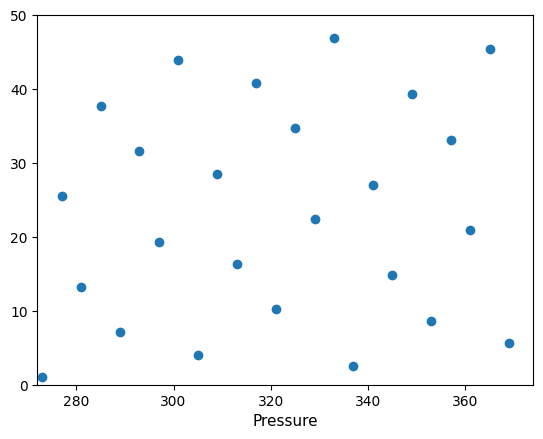

In [5]:
from matplotlib import pyplot as plt

plt.plot(samples[:, 0], samples[:, 1], "o")
plt.xlabel(r"Temperature", fontsize=11)
plt.xlabel(r"Pressure", fontsize=11)
plt.xlim(272, 374)
plt.ylim(0, 50)
plt.show()

In [6]:
import numpy as np

brainin_data = np.loadtxt("brainin_30.txt")
print(brainin_data, "\n\nDataset shape:", brainin_data.shape)

[[ 3.15107413e+00  4.17554078e+00  4.03815759e+00]
 [ 1.36776386e+00  1.26716420e+01  8.60127077e+01]
 [-4.92921716e+00  1.82353681e+00  2.41888089e+02]
 [ 5.06123627e+00  1.23877913e+01  1.37242426e+02]
 [-2.94940115e+00  8.62639994e+00  1.07587601e+01]
 [ 8.36982931e+00  3.13803183e+00  7.24964869e+00]
 [-2.22007671e+00  1.62565336e+00  7.71988248e+01]
 [-1.70453761e+00  1.46793568e+01  3.99820398e+01]
 [ 7.17524724e+00  2.57911519e+00  1.78453527e+01]
 [ 7.24337123e+00  4.11110621e+00  2.36937839e+01]
 [ 1.47556275e+00  1.41004473e+01  1.14292050e+02]
 [ 7.26474068e+00  5.04167925e+00  2.96703147e+01]
 [-2.36884319e+00  5.59248069e+00  2.71582680e+01]
 [-4.91467239e+00  3.78639530e+00  1.84993457e+02]
 [ 6.93493763e+00  2.28824569e-01  1.85302363e+01]
 [ 3.98265065e+00  9.05706809e+00  5.75698037e+01]
 [-3.42278472e+00  5.72915167e+00  5.30702398e+01]
 [-4.45285915e+00  1.33561735e+01  1.27882794e+01]
 [ 9.71381286e+00  8.99129832e-01  4.14567857e+00]
 [ 8.35818917e+00  8.65352249e+

C:\Users\dang\AppData\Local\Temp\ipykernel_21028\142152307.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(


Text(0.5, 0, '$y$')

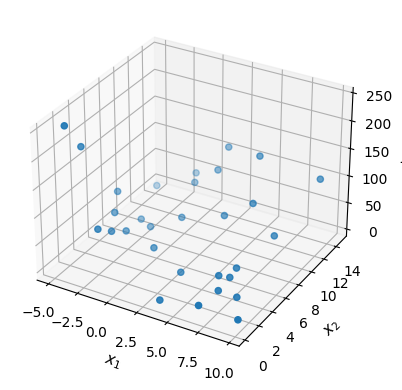

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(6, 4), tight_layout=True)
ax = fig1.add_subplot(111, projection="3d")
ax.scatter3D(
    brainin_data[:, 0], brainin_data[:, 1], brainin_data[:, 2], cmap=brainin_data[:, 2]
)
ax.set_xlabel(r"$x_{1}$", fontsize=11)
ax.set_ylabel(r"$x_{2}$", fontsize=11)
ax.set_zlabel(r"$y$", fontsize=11)

In [8]:
from idaes.core.surrogate.pysmo.polynomial_regression import PolynomialRegression

In [9]:
poly_class = PolynomialRegression(
    original_data_input=brainin_data,
    regression_data_input=brainin_data,
    maximum_polynomial_order=4,
    multinomials=1,
    training_split=0.8,
    number_of_crossvalidations=10,
    overwrite=True,
)


===========================Polynomial Regression===============================================


No iterations will be run.
Default parameter estimation method is used.
Parameter estimation method:  pyomo 



In [10]:
vars = poly_class.get_feature_vector()

In [11]:
vars.pprint()

IndexedParam : Size=2, Index={0, 1}, Domain=Any, Default=None, Mutable=True
    Key : Value
      0 :     0
      1 :     0


In [12]:
from pyomo.environ import exp

poly_class.set_additional_terms(
    [vars[0] * vars[0] * vars[1] * vars[1], exp(vars[0]), exp(vars[1])]
)

In [13]:
poly_class.training()

No iterations will be run.



Best surrogate model is of order 3  with a cross-val S.S. Error  of 19.737617

------------------------------------------------------------
The final coefficients of the regression terms are: 

k               | 57.607003
(x_ 1 )^ 1      | -19.078561
(x_ 2 )^ 1      | -17.191563
(x_ 1 )^ 2      | 3.889924
(x_ 2 )^ 2      | 1.163328
(x_ 1 )^ 3      | -0.351928
(x_ 2 )^ 3      | 0.018398
x_ 1 .x_ 2      | 3.100135

The coefficients of the extra terms in additional_regression_features are:

Coeff. additional_regression_features[ 1 ]:  -0.017933
Coeff. additional_regression_features[ 2 ]:  0.004746
Coeff. additional_regression_features[ 3 ]:  -1.3e-05

Regression model performance on training data:
Order:  3  / MAE: 6.154513  / MSE: 65.995248  / R^2: 0.978531

Results saved in  solution.pickle



Results of polynomial regression run:

Polynomial order                   : 3
Number of terms in polynomial model: 11

Polynomial Expression:
--------------------------

57.60700349249289 -19.078560846595344*IndexedParam[0] -17.191563035875806*IndexedParam[1] + 3.8899241750021663*IndexedParam[0]**2 + 1.1633280319958954*IndexedParam[1]**2 -0.3519284134546862*IndexedParam[0]**3 + 0.018398180902055014*IndexedParam[1]**3 + 3.1001348356698335*(IndexedParam[1]*IndexedParam[0]) -0.017933037213866673*(IndexedParam[0]*IndexedParam[0]*IndexedParam[1]*IndexedParam[1]) + 0.00474571104342994*exp(IndexedParam[0]) -1.2975320261052192e-05*exp(IndexedParam[1])
--------------------------

Model training errors:
-----------------------
Mean Squared Error (MSE)         : 65.99524781717177
Root Mean Squared Error (RMSE)   : 8.123745922736122
Mean Absolute error (MSE)        : 6.154513199255071
Goodness of fit (R2)             : 0.97853053384543


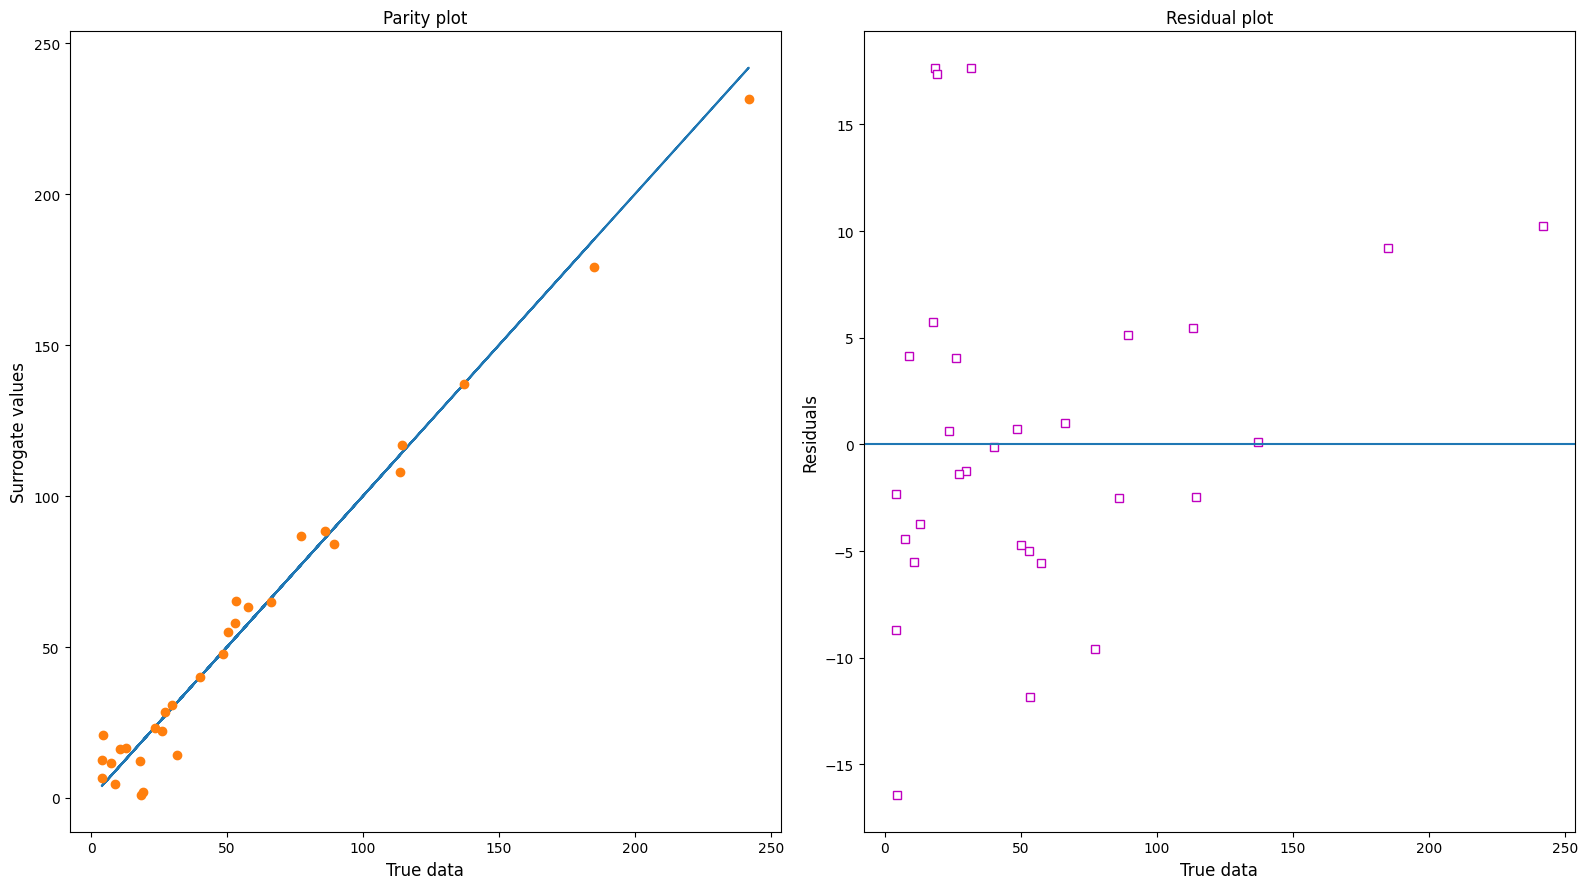

In [14]:
poly_class.parity_residual_plots()

In [15]:
from pyomo.environ import Var, ConcreteModel

m = ConcreteModel()
m.x = Var([1, 2])
print(poly_class.generate_expression([m.x[1], m.x[2]]))

57.60700349249289 - 19.078560846595344*x[1] - 17.191563035875806*x[2] + 3.8899241750021663*x[1]**2 + 1.1633280319958954*x[2]**2 - 0.3519284134546862*x[1]**3 + 0.018398180902055014*x[2]**3 + 3.1001348356698335*(x[2]*x[1]) - 0.017933037213866673*(x[1]*x[1]*x[2]*x[2]) + 0.00474571104342994*exp(x[1]) - 1.2975320261052192e-05*exp(x[2])


In [16]:
unsampled_points = np.array([[5, 8], [-3, 10], [-2, 3]])
ys = poly_class.predict_output(unsampled_points)
print(ys)

[[57.7897913 ]
 [12.74008178]
 [54.28524655]]


In [17]:
import numpy as np

brainin_data = np.loadtxt("brainin_30.txt")
from idaes.core.surrogate.pysmo.radial_basis_function import RadialBasisFunctions

In [18]:
rbf_class = RadialBasisFunctions(
    XY_data=brainin_data, basis_function="gaussian", overwrite=True
)


Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  gaussian
Regularization done:  True


In [19]:
vars = rbf_class.get_feature_vector()

In [20]:
rbf_class.training()

0.001    |     1e-05    |     1.3301889998200778    |     2.617033025617939e+18    |     581.0980642490946    |     2999999.799684093    |     6.661337702960275e-10
0.001    |     2e-05    |     1.3231321486408805    |     2.617033025617939e+18    |     581.0980642490946    |     1500000.3998825976    |     3.3306699617932037e-10
0.001    |     5e-05    |     1.3204882439259298    |     2.617033025617939e+18    |     581.0980642490946    |     600000.7598812891    |     1.332269316825594e-10
0.001    |     7.5e-05    |     1.3203184940698294    |     2.617033025617939e+18    |     581.0980642490946    |     400000.83992756554    |     8.881802847139698e-11
0.001    |     0.0001    |     1.3203209127607705    |     2.617033025617939e+18    |     581.0980642490946    |     300000.87994022475    |     6.661357686348896e-11
0.001    |     0.0002    |     1.3204538291266512    |     2.617033025617939e+18    |     581.0980642490946    |     150000.93996802374    |     3.330689945358317e-11
0

0.01    |     0.0005    |     1.3439837129675036    |     3.1512395573940506e+18    |     699.7157425456925    |     59998.59877129844    |     1.3322365160228432e-11
0.01    |     0.00075    |     1.3350937119915491    |     3.1512395573940506e+18    |     699.7157425456925    |     39999.39918084796    |     8.881650788350007e-12
0.01    |     0.001    |     1.3301839804869129    |     3.1512395573940506e+18    |     699.7157425456925    |     29999.79938562382    |     6.661293602411038e-12
0.01    |     0.002    |     1.3231293127499846    |     3.1512395573940506e+18    |     699.7157425456925    |     15000.399692799207    |     3.330757823505161e-12
0.01    |     0.005    |     1.3204830758443447    |     3.1512395573940506e+18    |     699.7157425456925    |     6000.759877119498    |     1.3324363561649784e-12
0.01    |     0.0075    |     1.3203100371669951    |     3.1512395573940506e+18    |     699.7157425456925    |     4000.8399180790343    |     8.883649189781538e-13
0.

0.05    |     0.00075    |     1.3958259187901485    |     9.566972988576444e+18    |     2124.2947375769027    |     39961.01507185149    |     8.873127804032486e-12
0.05    |     0.001    |     1.3944270862079113    |     9.566972988576444e+18    |     2124.2947375769027    |     29971.01130389779    |     6.654901364177632e-12
0.05    |     0.002    |     1.3868038656182715    |     9.566972988576444e+18    |     2124.2947375769027    |     14986.005651941347    |     3.3275617043896025e-12
0.05    |     0.005    |     1.367610236733643    |     9.566972988576444e+18    |     2124.2947375769027    |     5995.002260777159    |     1.3311579085189338e-12
0.05    |     0.0075    |     1.3569104532324152    |     9.566972988576444e+18    |     2124.2947375769027    |     3997.001507183094    |     8.875126205472248e-13
0.05    |     0.01    |     1.349296442539498    |     9.566972988576444e+18    |     2124.2947375769027    |     2998.0011303872725    |     6.656899765616392e-13
0.05  

0.075    |     0.02    |     1.3518655278680693    |     2.3844739540377185e+18    |     529.4595770783325    |     1497.630170324488    |     3.325406994935083e-13
0.075    |     0.05    |     1.3317271553627907    |     2.3844739540377185e+18    |     529.4595770783325    |     599.6520681297744    |     1.3314950656035372e-13
0.075    |     0.075    |     1.3262949589526671    |     2.3844739540377185e+18    |     529.4595770783325    |     400.10137875318554    |     8.88403525752114e-14
0.075    |     0.1    |     1.3237555826770937    |     2.3844739540377185e+18    |     529.4595770783325    |     300.3260340648898    |     6.668577558263996e-14
0.075    |     0.2    |     1.3207755491672837    |     2.3844739540377185e+18    |     529.4595770783325    |     150.66301703244366    |     3.3453910093782216e-14
0.075    |     0.5    |     1.3198839335916885    |     2.3844739540377185e+18    |     529.4595770783325    |     60.86520681297757    |     1.3514790800467928e-14
0.075   

1.0    |     0.05    |     0.7405769938099291    |     63914572356.9399    |     1.4191885967949048e-05    |     427.0878219429175    |     9.483254669160724e-14
1.0    |     0.075    |     0.7971634633262159    |     63914572356.9399    |     1.4191885967949048e-05    |     285.05854859317236    |     6.32957128028738e-14
1.0    |     0.1    |     0.8372760302121777    |     63914572356.9399    |     1.4191885967949048e-05    |     214.04391168158912    |     4.752729580594675e-14
1.0    |     0.2    |     0.9403435142235638    |     63914572356.9399    |     1.4191885967949048e-05    |     107.52195601832739    |     2.3874670244856097e-14
1.0    |     0.5    |     1.0888716539372492    |     63914572356.9399    |     1.4191885967949048e-05    |     43.60878244993882    |     9.683094870358305e-15
1.0    |     0.75    |     1.149981397877131    |     63914572356.9399    |     1.4191885967949048e-05    |     29.40585497293814    |     6.5294114499488166e-15
1.0    |     1    |     1.1

5.0    |     0.2    |     0.8919888448352008    |     555.6368040064596    |     1.2337615462742137e-13    |     21.38286976604843    |     4.74795086936562e-15
5.0    |     0.5    |     1.0120030229593935    |     555.6368040064596    |     1.2337615462742137e-13    |     9.336977975122133    |     2.073225585679713e-15
5.0    |     0.75    |     1.082703837784837    |     555.6368040064596    |     1.2337615462742137e-13    |     6.585973686347974    |     1.462379925231788e-15
5.0    |     1    |     1.1385693673981572    |     555.6368040064596    |     1.2337615462742137e-13    |     5.2000553828745195    |     1.1546442430786551e-15
7.5    |     1e-05    |     1.1579727162941074    |     65.42062274366069    |     1.4526296331065655e-14    |     65.40750197167768    |     1.4523382934434376e-14
7.5    |     2e-05    |     1.1579776842823721    |     65.42062274366069    |     1.4526296331065655e-14    |     65.39438654331279    |     1.4520470724324672e-14
7.5    |     5e-05    |

10.0    |     0.0001    |     1.4571187575372524    |     19.1758649005436    |     4.257897345936979e-15    |     19.162118306915037    |     4.254844988985659e-15
10.0    |     0.0002    |     1.4571430520739164    |     19.1758649005436    |     4.257897345936979e-15    |     19.148392490952478    |     4.251797245602979e-15
10.0    |     0.0005    |     1.4572159092372134    |     19.1758649005436    |     4.257897345936979e-15    |     19.10733923905197    |     4.242681592503843e-15
10.0    |     0.00075    |     1.4572765932520457    |     19.1758649005436    |     4.257897345936979e-15    |     19.073269807537805    |     4.23511665904326e-15
10.0    |     0.001    |     1.457337249749875    |     19.1758649005436    |     4.257897345936979e-15    |     19.039328340305342    |     4.227580139361052e-15
10.0    |     0.002    |     1.4575796008997444    |     19.1758649005436    |     4.257897345936979e-15    |     18.904827802739526    |     4.197715020635046e-15
10.0    |     

200.0    |     0.002    |     1.7391475409434969    |     1.0000000000000004    |     2.220446049250314e-16    |     1.0000000000000004    |     2.220446049250314e-16
200.0    |     0.005    |     1.739147540943497    |     1.0000000000000004    |     2.220446049250314e-16    |     1.0000000000000004    |     2.220446049250314e-16
200.0    |     0.0075    |     1.7391475409434973    |     1.0000000000000004    |     2.220446049250314e-16    |     1.0000000000000004    |     2.220446049250314e-16
200.0    |     0.01    |     1.739147540943497    |     1.0000000000000004    |     2.220446049250314e-16    |     1.0000000000000004    |     2.220446049250314e-16
200.0    |     0.02    |     1.739147540943497    |     1.0000000000000004    |     2.220446049250314e-16    |     1.0000000000000002    |     2.2204460492503136e-16
200.0    |     0.05    |     1.739147540943497    |     1.0000000000000004    |     2.220446049250314e-16    |     1.0000000000000004    |     2.220446049250314e-16
200

1000.0    |     0.2    |     1.739147540943497    |     1.0    |     2.220446049250313e-16    |     1.0    |     2.220446049250313e-16
1000.0    |     0.5    |     1.739147540943497    |     1.0    |     2.220446049250313e-16    |     1.0    |     2.220446049250313e-16
1000.0    |     0.75    |     1.739147540943497    |     1.0    |     2.220446049250313e-16    |     1.0    |     2.220446049250313e-16
1000.0    |     1    |     1.739147540943497    |     1.0    |     2.220446049250313e-16    |     1.0    |     2.220446049250313e-16

Results saved in  solution.pickle



Results of radial basis function run:

Basis function type               : gaussian
Shape parameter                    : 0.75
Regularization parameter           : 2e-05
Number of terms in RBF model       : 31

RBF Expression:
--------------------------

4.038157591240296 + 237.8499310618983*(-1551.5244569757037*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012320084 -0.5518182560031254)**2 + ((IndexedParam[1] -0.22882456869508516)/14.45053220191546 -0.2731190901874679)**2)**0.5)**2) -334.7189127256274*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012320084 -0.4300326512391472)**2 + ((IndexedParam[1] -0.22882456869508516)/14.45053220191546 -0.8610629174234938)**2)**0.5)**2) + 235.58220307137026*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012320084)**2 + ((IndexedParam[1] -0.22882456869508516)/14.45053220191546 -0.11035664436222248)**2)**0.5)**2) + 27.88615333878147*exp(- (0.75*(((IndexedParam[0] + 4.929217157135412)/14.643030012320084 -0.6

In [21]:
print("R2: ", rbf_class.R2, "\nRMSE: ", rbf_class.rmse)

R2:  0.9918215668808201 
RMSE:  0.021080345887482862


In [22]:
unsampled_points = np.array([[5, 8], [-3, 10], [-2, 3]])
ys = rbf_class.predict_output(unsampled_points)
print(ys)

[[61.06401281]
 [12.7142377 ]
 [50.9750144 ]]


In [23]:
import numpy as np

brainin_data = np.loadtxt("brainin_30.txt")
from idaes.core.surrogate.pysmo.kriging import KrigingModel

In [24]:
krg_class = KrigingModel(XY_data=brainin_data, overwrite=True)

In [25]:
vars = krg_class.get_feature_vector()

In [26]:
krg_class.training()

Optimizing kriging parameters using L-BFGS-B algorithm...



Final results
Theta: [6.01331266 0.22759698] 
Mean: [[387.02434744]] 
Regularization parameter: 1.000000000001e-06

Results saved in  solution.pickle



Results of Kriging run:

Kriging mean                     : [[387.02434744]]
Kriging variance                 : [[70601.04510613]]
Kriging weights                  : [6.01331266 0.22759698]
Regularization parameter         : 1.000000000001e-06
Number of terms in Kriging model : 31

Kriging Expression:
--------------------

387.0243474425336 + (3488.9895591409877*exp(- (6.013312663449754*((IndexedParam[0] + 4.929217157135412)/14.643030012320084 -0.5518182560031254)**2 + 0.22759697744050045*((IndexedParam[1] -0.22882456869508516)/14.45053220191546 -0.2731190901874679)**2)) -142125.16673306376*exp(- (6.013312663449754*((IndexedParam[0] + 4.929217157135412)/14.643030012320084 -0.4300326512391472)**2 + 0.22759697744050045*((IndexedParam[1] -0.22882456869508516)/14.45053220191546 -0.8610629174234938)**2)) + 89994.36449711025*exp(- (6.013312663449754*((IndexedParam[0] + 4.929217157135412)/14.643030012320084)**2 + 0.22759697744050045*((IndexedParam[1] -0.22882456869508516)/14.45053220191546 -

In [27]:
print("R2: ", krg_class.training_R2, "\nRMSE: ", krg_class.training_rmse)

R2:  0.9999981017944809 
RMSE:  0.07638662554379094


In [28]:
unsampled_points = np.array([[5, 8], [-3, 10], [-2, 3]])
ys = krg_class.predict_output(unsampled_points)
print(ys)

[[57.63147437]
 [ 4.44393109]
 [50.80257576]]


In [29]:
print(krg_class.generate_expression([m.x[1], m.x[2]]))

3488.9895591409877*exp(- (6.013312663449754*((x[1] + 4.929217157135412)/14.643030012320084 - 0.5518182560031254)**2 + 0.22759697744050045*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.2731190901874679)**2)) - 142125.16673306376*exp(- (6.013312663449754*((x[1] + 4.929217157135412)/14.643030012320084 - 0.4300326512391472)**2 + 0.22759697744050045*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.8610629174234938)**2)) + 89994.36449711025*exp(- (6.013312663449754*((x[1] + 4.929217157135412)/14.643030012320084)**2 + 0.22759697744050045*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.11035664436222248)**2)) - 17412.78392747091*exp(- (6.013312663449754*((x[1] + 4.929217157135412)/14.643030012320084 - 0.6822668136056202)**2 + 0.22759697744050045*((x[2] - 0.22882456869508516)/14.45053220191546 - 0.8414199967160326)**2)) + 71051.7573741395*exp(- (6.013312663449754*((x[1] + 4.929217157135412)/14.643030012320084 - 0.13520535030959882)**2 + 0.22759697744050045*((x[2] - 0.22882456869508